##### Logistic Regression

In [405]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [406]:
df = pd.read_csv('datasets/Social_Network_Ads.csv')
print('Social network ads data\n',df)

Social network ads data
       User ID  Gender   Age  EstimatedSalary  Purchased
0    15624510    Male  19.0          19000.0          0
1    15810944    Male  35.0          20000.0          0
2    15668575  Female  26.0          43000.0          0
3    15603246  Female  27.0          57000.0          0
4    15804002    Male  19.0          76000.0          0
..        ...     ...   ...              ...        ...
395  15691863  Female  46.0          41000.0          1
396  15706071    Male  51.0          23000.0          1
397  15654296  Female  50.0          20000.0          1
398  15755018    Male  36.0          33000.0          0
399  15594041  Female  49.0          36000.0          1

[400 rows x 5 columns]


###### separate the input and output variable

In [407]:
# separate the input and output variable
x = df[['Age', 'EstimatedSalary']] #2inputs
y = df['Purchased']#output

In [408]:
x.describe

<bound method NDFrame.describe of       Age  EstimatedSalary
0    19.0          19000.0
1    35.0          20000.0
2    26.0          43000.0
3    27.0          57000.0
4    19.0          76000.0
..    ...              ...
395  46.0          41000.0
396  51.0          23000.0
397  50.0          20000.0
398  36.0          33000.0
399  49.0          36000.0

[400 rows x 2 columns]>

In [409]:
set(y), np.unique(y) #to check wether y has 0 or 1

({0, 1}, array([0, 1], dtype=int64))

<Axes: xlabel='Purchased', ylabel='count'>

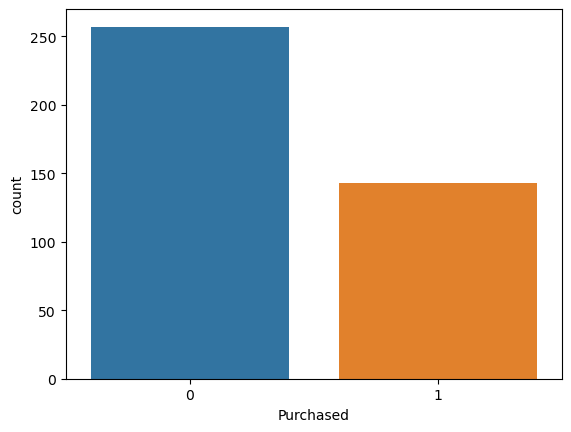

In [410]:
sns.countplot(x=y)

In [411]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

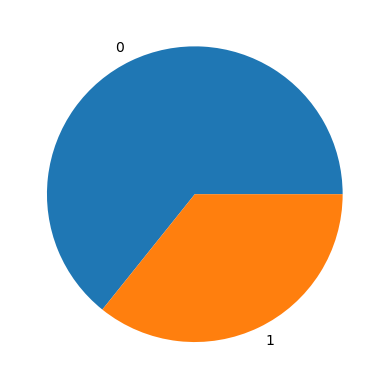

In [412]:
plt.pie(y.value_counts(), labels = y.value_counts().index);

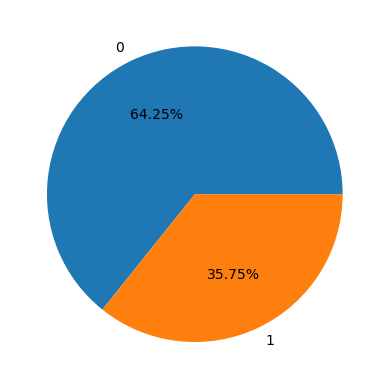

In [413]:
plt.pie(y.value_counts(), labels = y.value_counts().index, autopct='%2.2f%%');

In [414]:
z=df['Gender']

In [415]:
z.value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

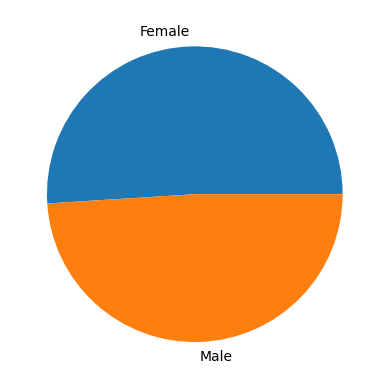

In [416]:
plt.pie(z.value_counts(), labels = z.value_counts().index);

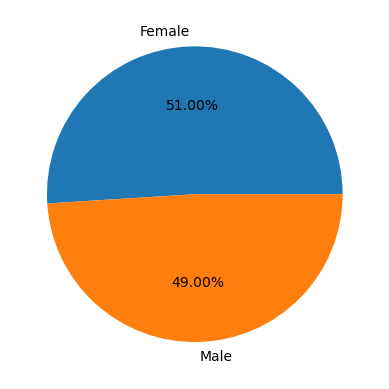

In [417]:
plt.pie(z.value_counts(), labels = z.value_counts().index, autopct='%2.2f%%');

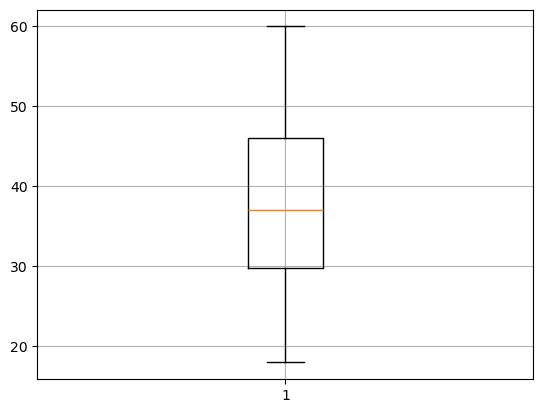

In [418]:
plt.boxplot(df['Age']);
plt.grid()

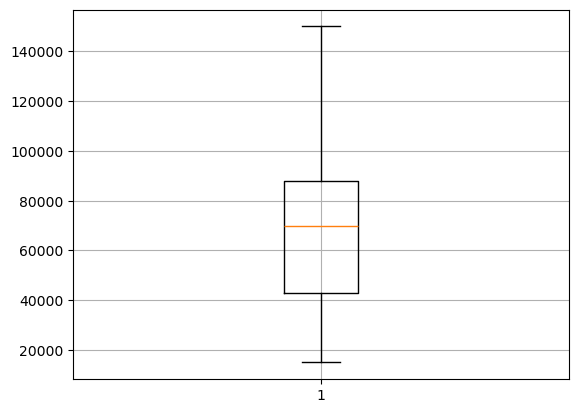

In [419]:
plt.boxplot(df['EstimatedSalary']);
plt.grid()

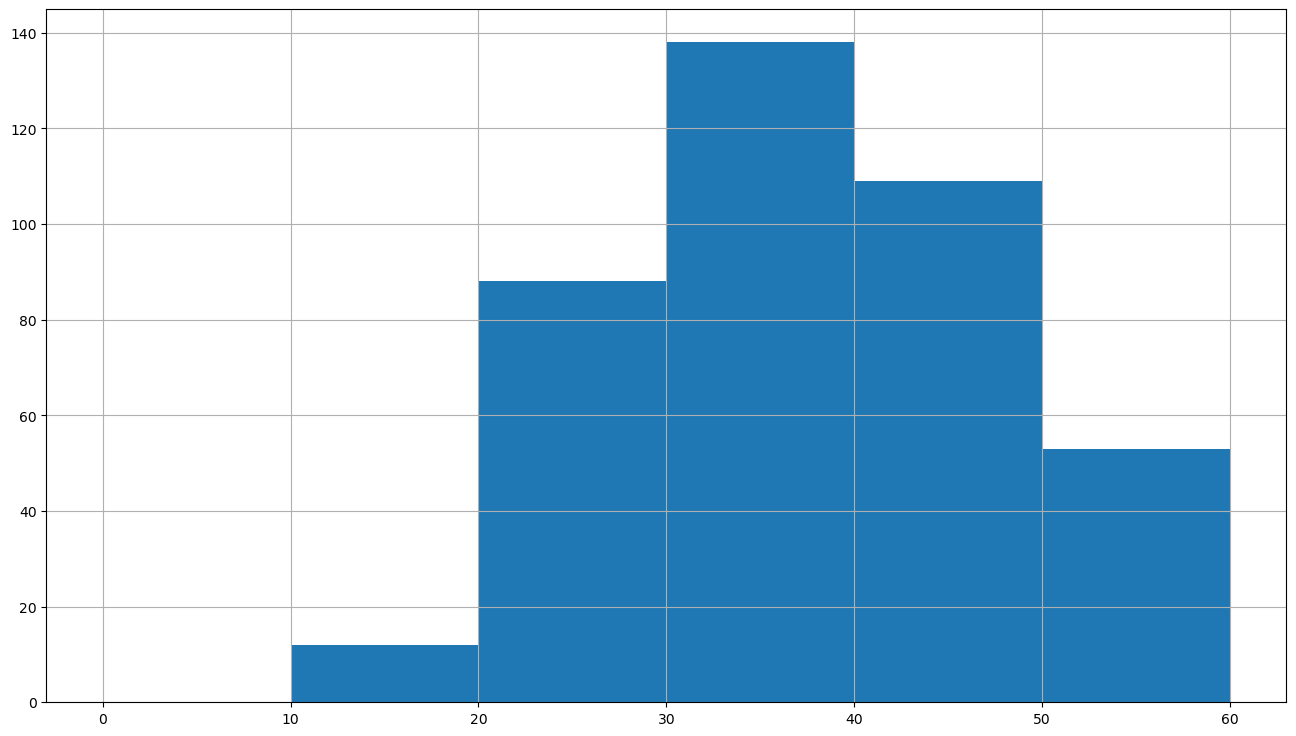

In [420]:
plt.figure(figsize = (16,9))
plt.xticks(range(0,61,10))
plt.hist(df['Age'], range(0,61,10))
plt.grid()

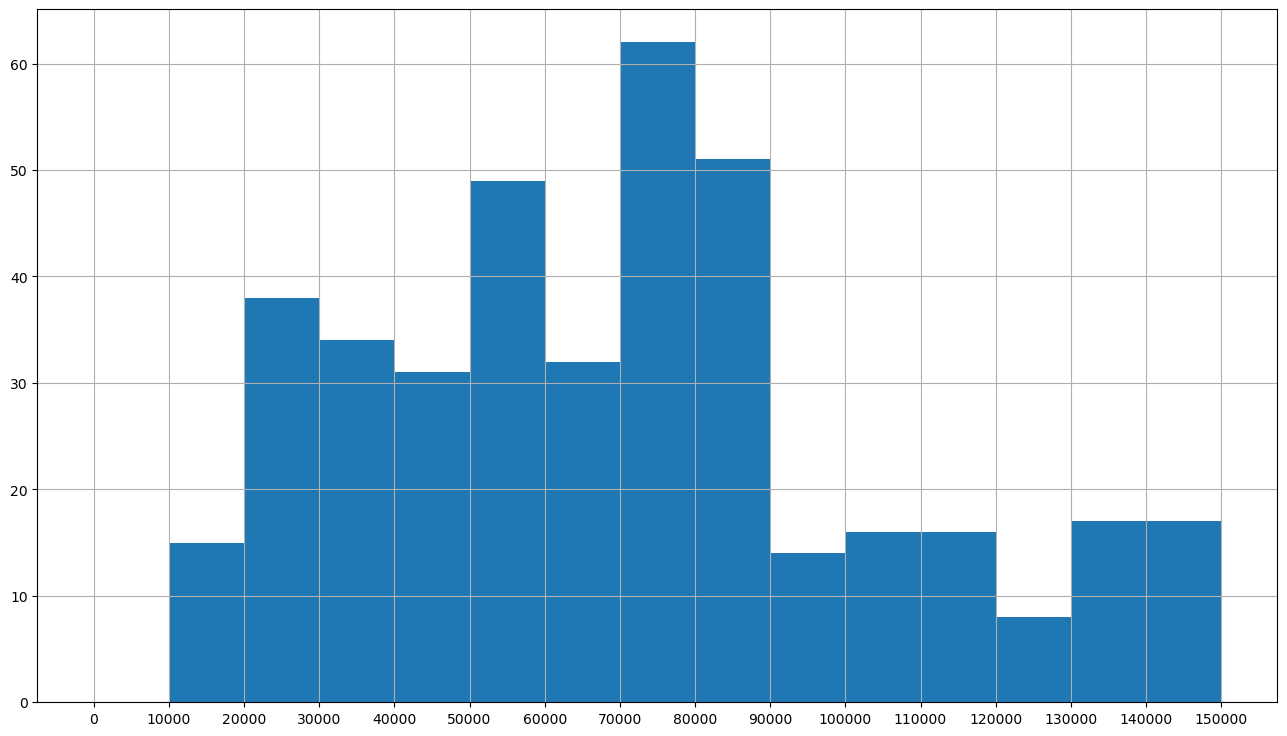

In [421]:
plt.figure(figsize = (16,9))
plt.xticks(range(0,150001,10000))
plt.hist(df['EstimatedSalary'], range(0,150001,10000))
plt.grid()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

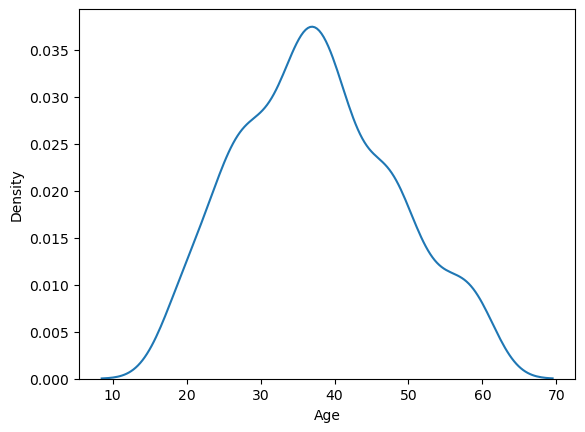

In [422]:
sns.kdeplot(df['Age'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


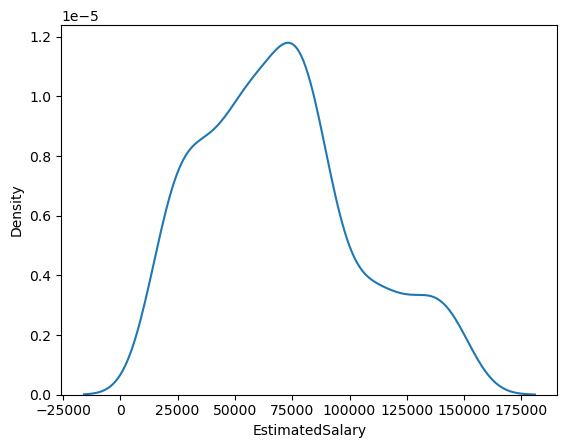

In [423]:
sns.kdeplot(df['EstimatedSalary']);

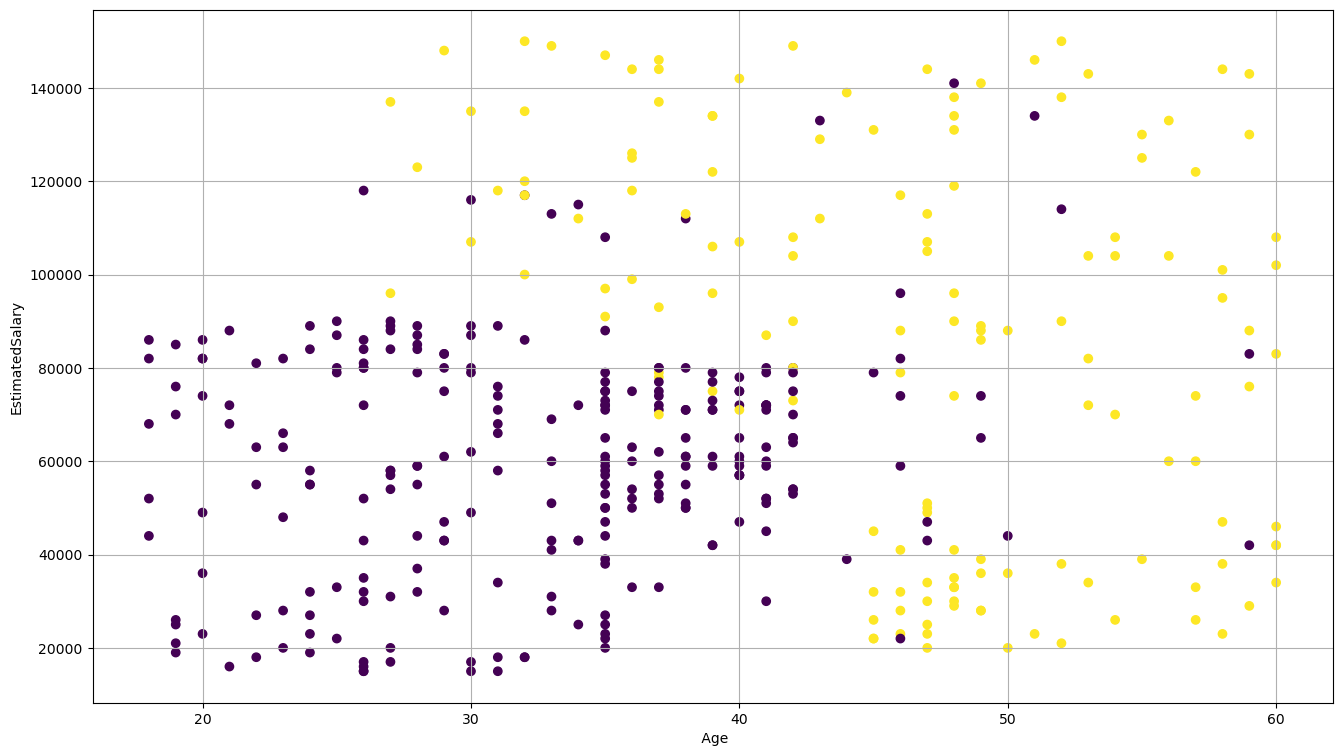

In [424]:
plt.figure(figsize = (16,9))
plt.xlabel(' Age')
plt.ylabel('EstimatedSalary')
plt.grid()
plt.scatter(x['Age'], x['EstimatedSalary'], c=y)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


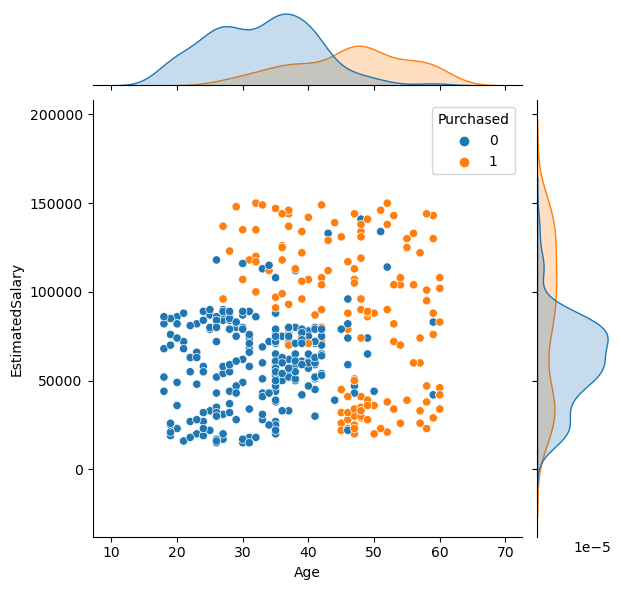

In [425]:
sns.jointplot(x='Age', y= 'EstimatedSalary', data = df, hue = 'Purchased')

In [426]:
# feature scalling
from sklearn.preprocessing  import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [427]:
#cross validation
from sklearn.model_selection import train_test_split

In [428]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state = 0)

In [429]:
x_train.shape, x_test.shape, y_test.shape

((300, 2), (100, 2), (100,))

In [430]:
#build the model
from sklearn.linear_model import LogisticRegression

In [431]:
classifier = LogisticRegression()

In [432]:
#train the algorithnm
classifier.fit(x_train, y_train)

LogisticRegression()

In [433]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [434]:
y_test.value_counts()

Purchased
0    68
1    32
Name: count, dtype: int64

In [435]:
#performance evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [436]:
print(confusion_matrix(y_test, y_pred))

[[67  1]
 [10 22]]


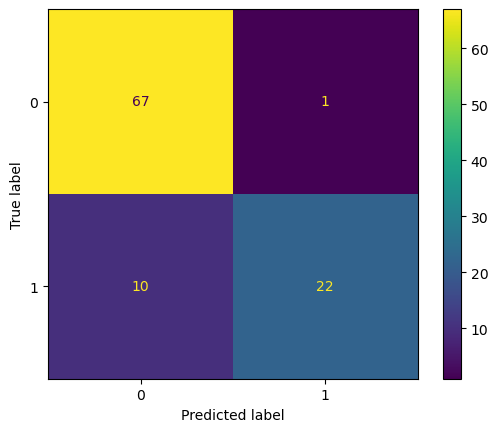

In [437]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [438]:
accuracy_score(y_test, y_pred)

0.89

In [439]:
cm = confusion_matrix(y_test, y_pred)
cm.diagonal().sum()/cm.sum()

0.89

In [440]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [441]:
# recall/accuracy of class 0/ sensitivity of algorithm
r0 = 67/68
r0

0.9852941176470589

In [442]:
# recall/accuracy of class 1/ specificity of algorithm
r1 = 22/32
r1

0.6875

In [443]:
# precision0 / positive predictive value
p0 = 67/77
p0

0.8701298701298701

In [444]:
# precision1 / positive predictive value
p1 = 22/23
p1

0.9565217391304348

In [445]:
#f1 score0
2*p0*r0/(p0+r0)

0.9241379310344828

In [446]:
#f1 score1
2*p1*r1/(p1+r1)

0.8

In [447]:
classifier.predict_proba(x_test)

array([[0.79225834, 0.20774166],
       [0.75067874, 0.24932126],
       [0.72745429, 0.27254571],
       [0.8159242 , 0.1840758 ],
       [0.81025799, 0.18974201],
       [0.95014473, 0.04985527],
       [0.92927087, 0.07072913],
       [0.39370124, 0.60629876],
       [0.95662616, 0.04337384],
       [0.54623349, 0.45376651],
       [0.88624081, 0.11375919],
       [0.89780651, 0.10219349],
       [0.7548652 , 0.2451348 ],
       [0.61732595, 0.38267405],
       [0.92568557, 0.07431443],
       [0.63220622, 0.36779378],
       [0.67066218, 0.32933782],
       [0.93447243, 0.06552757],
       [0.08457049, 0.91542951],
       [0.87847026, 0.12152974],
       [0.81877656, 0.18122344],
       [0.15276153, 0.84723847],
       [0.67567934, 0.32432066],
       [0.27289303, 0.72710697],
       [0.96313902, 0.03686098],
       [0.13128108, 0.86871892],
       [0.82800591, 0.17199409],
       [0.83014568, 0.16985432],
       [0.72970907, 0.27029093],
       [0.75480803, 0.24519197],
       [0.

In [448]:
# prediction on unseen data
new = np.array([[25,48000],[58,128000],[36,63000],[32,70000]])
new

array([[    25,  48000],
       [    58, 128000],
       [    36,  63000],
       [    32,  70000]])

In [449]:
new_scaled = scaler.transform(new)
new_scaled

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.16666667, 0.24444444],
       [0.95238095, 0.83703704],
       [0.42857143, 0.35555556],
       [0.33333333, 0.40740741]])

In [450]:
y_pred = classifier.predict(new_scaled)
y_pred

array([0, 1, 0, 0], dtype=int64)

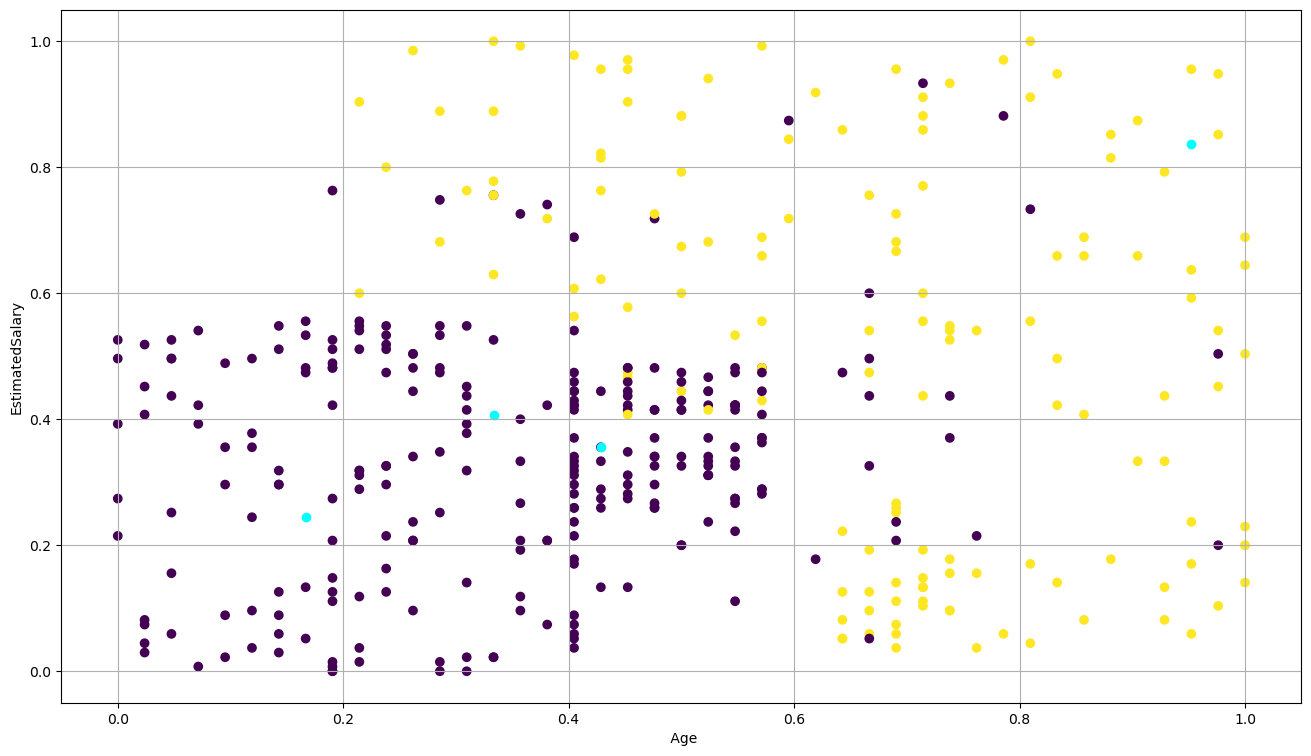

In [451]:
plt.figure(figsize = (16,9))
plt.xlabel(' Age')
plt.ylabel('EstimatedSalary')
plt.grid()
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=y)
plt.scatter(new_scaled[:,0], new_scaled[:,1], color='cyan')

In [452]:
classifier.predict_proba(new_scaled)

array([[0.93426462, 0.06573538],
       [0.06334824, 0.93665176],
       [0.7485386 , 0.2514614 ],
       [0.80615001, 0.19384999]])

In [453]:
x_test

array([[0.28571429, 0.53333333],
       [0.47619048, 0.25925926],
       [0.4047619 , 0.44444444],
       [0.28571429, 0.47407407],
       [0.4047619 , 0.25925926],
       [0.21428571, 0.03703704],
       [0.30952381, 0.        ],
       [0.42857143, 0.95555556],
       [0.        , 0.39259259],
       [0.69047619, 0.20740741],
       [0.28571429, 0.25185185],
       [0.23809524, 0.2962963 ],
       [0.45238095, 0.2962963 ],
       [0.5       , 0.45925926],
       [0.04761905, 0.52592593],
       [0.33333333, 0.75555556],
       [0.45238095, 0.45925926],
       [0.02380952, 0.51851852],
       [0.88095238, 0.85185185],
       [0.4047619 , 0.05185185],
       [0.4047619 , 0.23703704],
       [0.69047619, 0.95555556],
       [0.54761905, 0.26666667],
       [0.69047619, 0.66666667],
       [0.11904762, 0.0962963 ],
       [0.73809524, 0.93333333],
       [0.23809524, 0.53333333],
       [0.26190476, 0.48148148],
       [0.45238095, 0.34814815],
       [0.33333333, 0.52592593],
       [0.

In [454]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000
